<a href="https://colab.research.google.com/github/GauravSahani1417/Cotton-Disease-prediction-using-Colab/blob/master/Cotton_Disease_prediction_using_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Taken from tensorflow documentation, in order to keep working the GPU usage upto just 50% limit.
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-size all the images to 224*224
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton disease prediction/train'
valid_path = '/content/drive/My Drive/Cotton disease prediction/val'

In [5]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Cotton disease prediction/train/*')

In [8]:
len(folders)

4

In [9]:
# We'll flatten the last layers, in order to add our output layers to resnet50 model
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton disease prediction/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton disease prediction/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [20]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 46s 755ms/step - loss: 1.4333 - accuracy: 0.7786 - val_loss: 0.6433 - val_accuracy: 0.8642
Epoch 2/20
61/61 [==============================] - 43s 710ms/step - loss: 0.6377 - accuracy: 0.8801 - val_loss: 0.5627 - val_accuracy: 0.9198
Epoch 3/20
61/61 [==============================] - 43s 707ms/step - loss: 0.4974 - accuracy: 0.9175 - val_loss: 0.5607 - val_accuracy: 0.8827
Epoch 4/20
61/61 [==============================] - 43s 713ms/step - loss: 0.7145 - accuracy: 0.9016 - val_loss: 1.1692 - val_accuracy: 0.8611
Epoch 5/20
61/61 [==============================] - 44s 717ms/step - loss: 0.8372 - accuracy: 0.9052 - val_loss: 0.6237 - val_accuracy: 0.9198
Epoch 6/20
61/61 [==============================] - 44s 721ms/step - loss: 0.5016 - accuracy: 0.9364 - val_loss: 0.6684 - val_accuracy: 0.8920
Epoch 7/20
61/61 [==============================] - 43s 710ms/step - loss: 0.6055 - accuracy: 0.9293 - val_loss: 0.8480 - val_accuracy: 0.9198

In [21]:
import matplotlib.pyplot as plt

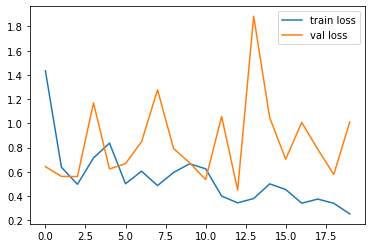

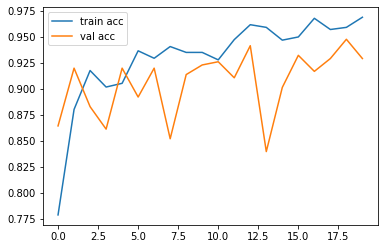

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# saving it as a h5 file
from tensorflow.keras.models import load_model

model.save('cotton_disease_inceptionV3.h5')

In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred

array([[1.6629086e-14, 1.2935620e-09, 1.0000000e+00, 3.8296891e-10],
       [3.1659763e-31, 1.0000000e+00, 2.3979519e-22, 1.8832100e-20],
       [2.3994615e-37, 1.0000000e+00, 8.4673488e-33, 1.8835770e-27],
       ...,
       [1.2482625e-29, 1.0142189e-14, 9.8636375e-18, 1.0000000e+00],
       [3.4234927e-19, 5.8873263e-27, 1.0000000e+00, 1.5225727e-17],
       [1.4190736e-11, 4.5391986e-19, 1.0000000e+00, 5.1749970e-19]],
      dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([2, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 3, 1, 3, 1,
       0, 2, 3, 1, 3, 3, 1, 3, 0, 1, 0, 3, 3, 2, 2, 3, 2, 1, 0, 3, 3, 2,
       3, 3, 0, 0, 1, 3, 2, 3, 0, 1, 2, 3, 2, 1, 1, 3, 0, 1, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 3, 0, 1,
       1, 3, 1, 0, 2, 1, 3, 1, 1, 2, 3, 1, 0, 1, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 0, 2, 3, 3, 1, 3, 2, 0, 2, 0, 0, 3, 2, 2, 3,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 3, 3, 2, 2, 3, 0, 2, 0, 2, 1, 0,
       3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 1, 3, 0, 3, 1, 1, 2, 1, 3, 1, 2, 0,
       3, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 3,
       1, 3, 3, 1, 1, 0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 2, 3, 3, 1, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 3, 1, 1, 0, 0, 3, 1, 1, 2, 1, 2, 3, 1, 2, 0, 2,
       1, 2, 1, 2, 2, 2, 0, 1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0, 1, 2, 2,
       1, 3, 3, 3, 2, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0,